In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load the data
df = pd.read_csv('Data/engines2_data_cleaned_no_outliers_lstm.csv')
df

,eposition,flight_phase,flight_datetime,eng_install_date,cycles,egt_probe_average,fuel_flw,corrected_fan_spd,core_spd,zpn12p,vib_n1_1_bearing,vib_n2_1_bearing,vib_n2_turbine_frame,eng_type,eng_number,flight_datetime_c,date,time,flight_cycle,RUL
0,1,TAKEOFF,29-02-20 7:09,19-01-20 22:00,37.0,810.5125,1520.0,82.9875,103.19,79.21,0.1000,0.275,0.700,2,1,2020-02-29 07:09:00,2020-02-29,07:09:00,1,4501
1,1,CLIMB,29-02-20 7:10,19-01-20 22:00,38.0,851.5125,5373.0,NaN,105.20,89.15,0.1267,0.375,0.500,2,1,2020-02-29 07:10:00,2020-02-29,07:10:00,1,4501
2,1,TAKEOFF,29-02-20 11:33,19-01-20 22:00,38.0,876.5125,1476.0,82.9875,106.00,84.16,0.0600,0.225,0.600,2,1,2020-02-29 11:33:00,2020-02-29,11:33:00,2,4500
3,1,CLIMB,29-02-20 11:33,19-01-20 22:00,39.0,870.5875,5239.0,NaN,106.23,89.70,0.1267,0.150,0.450,2,1,2020-02-29 11:33:00,2020-02-29,11:33:00,2,4500
4,1,TAKEOFF,29-02-20 18:24,19-01-20 22:00,39.0,804.8500,1587.0,77.9703,102.90,78.20,0.1133,0.300,0.750,2,1,2020-02-29 18:24:00,2020-02-29,18:24:00,3,4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54105,1,CLIMB,10-09-24 1:29,24-04-24 23:00,4464.0,901.9125,5204.0,NaN,105.98,88.46,0.2200,0.550,0.725,2,7,2024-09-10 01:29:00,2024-09-10,01:29:00,4096,2
54106,1,TAKEOFF,10-09-24 8:09,24-04-24 23:00,4464.0,935.6000,1885.0,82.1850,106.98,84.63,0.0867,0.600,0.825,2,7,2024-09-10 08:09:00,2024-09-10,08:09:00,4097,1
54107,1,CLIMB,10-09-24 8:09,24-04-24 23:00,4465.0,899.2250,5173.0,NaN,106.03,88.91,0.1800,0.200,0.350,2,7,2024-09-10 08:09:00,2024-09-10,08:09:00,4097,1
54108,1,TAKEOFF,10-09-24 14:28,24-04-24 23:00,4465.0,905.3500,2982.0,79.7197,105.61,81.93,0.1400,0.375,0.575,2,7,2024-09-10 14:28:00,2024-09-10,14:28:00,4098,0


In [5]:
df['flight_datetime_c'] = pd.to_datetime(df['flight_datetime'], format='%d-%m-%y %H:%M', dayfirst=True)

# Extract cyclical time features

df['hour'] = df['flight_datetime_c'].dt.hour
# df['dayofweek'] = df['flight_datetime_c'].dt.dayofweek
df['month'] = df['flight_datetime_c'].dt.month
# df['day'] = df['flight_datetime_c'].dt.day

# Encode them as sin/cos
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
# df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
# df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df.drop(columns=['hour','month'],inplace=True)
df

,eposition,flight_phase,flight_datetime,eng_install_date,cycles,egt_probe_average,fuel_flw,corrected_fan_spd,core_spd,zpn12p,...,eng_number,flight_datetime_c,date,time,flight_cycle,RUL,hour_sin,hour_cos,month_sin,month_cos
0,1,TAKEOFF,29-02-20 7:09,19-01-20 22:00,37.0,810.5125,1520.0,82.9875,103.19,79.21,...,1,2020-02-29 07:09:00,2020-02-29,07:09:00,1,4501,0.965926,-2.588190e-01,0.866025,5.000000e-01
1,1,CLIMB,29-02-20 7:10,19-01-20 22:00,38.0,851.5125,5373.0,NaN,105.20,89.15,...,1,2020-02-29 07:10:00,2020-02-29,07:10:00,1,4501,0.965926,-2.588190e-01,0.866025,5.000000e-01
2,1,TAKEOFF,29-02-20 11:33,19-01-20 22:00,38.0,876.5125,1476.0,82.9875,106.00,84.16,...,1,2020-02-29 11:33:00,2020-02-29,11:33:00,2,4500,0.258819,-9.659258e-01,0.866025,5.000000e-01
3,1,CLIMB,29-02-20 11:33,19-01-20 22:00,39.0,870.5875,5239.0,NaN,106.23,89.70,...,1,2020-02-29 11:33:00,2020-02-29,11:33:00,2,4500,0.258819,-9.659258e-01,0.866025,5.000000e-01
4,1,TAKEOFF,29-02-20 18:24,19-01-20 22:00,39.0,804.8500,1587.0,77.9703,102.90,78.20,...,1,2020-02-29 18:24:00,2020-02-29,18:24:00,3,4499,-1.000000,-1.836970e-16,0.866025,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54105,1,CLIMB,10-09-24 1:29,24-04-24 23:00,4464.0,901.9125,5204.0,NaN,105.98,88.46,...,7,2024-09-10 01:29:00,2024-09-10,01:29:00,4096,2,0.258819,9.659258e-01,-1.000000,-1.836970e-16
54106,1,TAKEOFF,10-09-24 8:09,24-04-24 23:00,4464.0,935.6000,1885.0,82.1850,106.98,84.63,...,7,2024-09-10 08:09:00,2024-09-10,08:09:00,4097,1,0.866025,-5.000000e-01,-1.000000,-1.836970e-16
54107,1,CLIMB,10-09-24 8:09,24-04-24 23:00,4465.0,899.2250,5173.0,NaN,106.03,88.91,...,7,2024-09-10 08:09:00,2024-09-10,08:09:00,4097,1,0.866025,-5.000000e-01,-1.000000,-1.836970e-16
54108,1,TAKEOFF,10-09-24 14:28,24-04-24 23:00,4465.0,905.3500,2982.0,79.7197,105.61,81.93,...,7,2024-09-10 14:28:00,2024-09-10,14:28:00,4098,0,-0.500000,-8.660254e-01,-1.000000,-1.836970e-16


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers


In [7]:
df = pd.get_dummies(df, columns=["flight_phase"])

#Define features
sensor_cols = ['eposition','egt_probe_average', 'fuel_flw', 'core_spd', 'zpn12p', 'vib_n1_1_bearing', 'vib_n2_1_bearing',
               'vib_n2_turbine_frame', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']+ \
              [col for col in df.columns if col.startswith("flight_phase_")]
df[sensor_cols]

,eposition,egt_probe_average,fuel_flw,core_spd,zpn12p,vib_n1_1_bearing,vib_n2_1_bearing,vib_n2_turbine_frame,hour_sin,hour_cos,month_sin,month_cos,flight_phase_CLIMB,flight_phase_TAKEOFF
0,1,810.5125,1520.0,103.19,79.21,0.1000,0.275,0.700,0.965926,-2.588190e-01,0.866025,5.000000e-01,False,True
1,1,851.5125,5373.0,105.20,89.15,0.1267,0.375,0.500,0.965926,-2.588190e-01,0.866025,5.000000e-01,True,False
2,1,876.5125,1476.0,106.00,84.16,0.0600,0.225,0.600,0.258819,-9.659258e-01,0.866025,5.000000e-01,False,True
3,1,870.5875,5239.0,106.23,89.70,0.1267,0.150,0.450,0.258819,-9.659258e-01,0.866025,5.000000e-01,True,False
4,1,804.8500,1587.0,102.90,78.20,0.1133,0.300,0.750,-1.000000,-1.836970e-16,0.866025,5.000000e-01,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54105,1,901.9125,5204.0,105.98,88.46,0.2200,0.550,0.725,0.258819,9.659258e-01,-1.000000,-1.836970e-16,True,False
54106,1,935.6000,1885.0,106.98,84.63,0.0867,0.600,0.825,0.866025,-5.000000e-01,-1.000000,-1.836970e-16,False,True
54107,1,899.2250,5173.0,106.03,88.91,0.1800,0.200,0.350,0.866025,-5.000000e-01,-1.000000,-1.836970e-16,True,False
54108,1,905.3500,2982.0,105.61,81.93,0.1400,0.375,0.575,-0.500000,-8.660254e-01,-1.000000,-1.836970e-16,False,True


In [8]:
scaler = MinMaxScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])
df[sensor_cols]

,eposition,egt_probe_average,fuel_flw,core_spd,zpn12p,vib_n1_1_bearing,vib_n2_1_bearing,vib_n2_turbine_frame,hour_sin,hour_cos,month_sin,month_cos,flight_phase_CLIMB,flight_phase_TAKEOFF
0,0.0,0.212563,0.087984,0.316314,0.245870,0.306091,0.255814,0.430769,0.982963,0.370590,0.933013,0.75,0.0,1.0
1,0.0,0.441230,0.931276,0.566625,0.877382,0.387818,0.348837,0.307692,0.982963,0.370590,0.933013,0.75,1.0,0.0
2,0.0,0.580661,0.078354,0.666252,0.560356,0.183655,0.209302,0.369231,0.629410,0.017037,0.933013,0.75,0.0,1.0
3,0.0,0.547616,0.901948,0.694894,0.912325,0.387818,0.139535,0.276923,0.629410,0.017037,0.933013,0.75,1.0,0.0
4,0.0,0.180982,0.102648,0.280199,0.181703,0.346801,0.279070,0.461538,0.000000,0.500000,0.933013,0.75,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54105,0.0,0.722323,0.894288,0.663761,0.833545,0.673401,0.511628,0.446154,0.629410,0.982963,0.000000,0.50,1.0,0.0
54106,0.0,0.910206,0.167870,0.788294,0.590216,0.265381,0.558140,0.507692,0.933013,0.250000,0.000000,0.50,0.0,1.0
54107,0.0,0.707334,0.887503,0.669988,0.862135,0.550964,0.186047,0.215385,0.933013,0.250000,0.000000,0.50,1.0,0.0
54108,0.0,0.741495,0.407967,0.617684,0.418679,0.428528,0.348837,0.353846,0.250000,0.066987,0.000000,0.50,0.0,1.0


In [9]:
# --- Rolling window for LSTM (3D shape) ---
def create_lstm_windows(data, window_size=20):
    X, y = [], []
    for engine_id in data['eng_number'].unique():
        engine_df = data[data['eng_number'] == engine_id].reset_index(drop=True)
        for i in range(len(engine_df) - window_size):
            window = engine_df.loc[i:i+window_size-1, sensor_cols].values.astype(np.float32)
            label = engine_df.loc[i + window_size - 1, 'RUL']
            X.append(window)
            y.append(label)
    return np.array(X), np.array(y)

In [10]:

# Create sequence data
X, y = create_lstm_windows(df, window_size=15)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Initial 80/20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)
# Further split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (43204, 15, 14), y_train shape: (43204,)
X_val shape: (5400, 15, 14), y_val shape: (5400,)
X_test shape: (5401, 15, 14), y_test shape: (5401,)


In [11]:
# --- LSTM Model ---
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss=MeanAbsoluteError(),metrics=[MeanSquaredError()])

# --- Callbacks: EarlyStopping + ModelCheckpoint ---
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
checkpoint_cb = ModelCheckpoint("best_lstmv1_model.keras",
                                monitor='val_loss',
                                save_best_only=True,
                                mode='min',
                                verbose=1)

C:\Users\marwa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# --- Training ---
history = model.fit(X_train, y_train,
                    epochs=350,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint_cb],
                    verbose=1)


Epoch 1/350
535/541 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2149.7849 - mean_squared_error: 6221816.0000
Epoch 1: val_loss improved from inf to 1604.62793, saving model to best_lstmv1_model.keras
541/541 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 2147.8362 - mean_squared_error: 6213243.0000 - val_loss: 1604.6279 - val_mean_squared_error: 3832793.7500
Epoch 2/350
535/541 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1438.0315 - mean_squared_error: 3106489.7500
Epoch 2: val_loss improved from 1604.62793 to 1121.40552, saving model to best_lstmv1_model.keras
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1436.2416 - mean_squared_error: 3098800.0000 - val_loss: 1121.4055 - val_mean_squared_error: 1727922.0000
Epoch 3/350
534/541 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1108.0375 - mean_squared_error: 1672254.2500
Epoch 3: val_loss improved from 1121.40552 to 1091.83618, saving model to best_lstmv1_model.keras
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1107.9725 - mean_squared_error: 1671

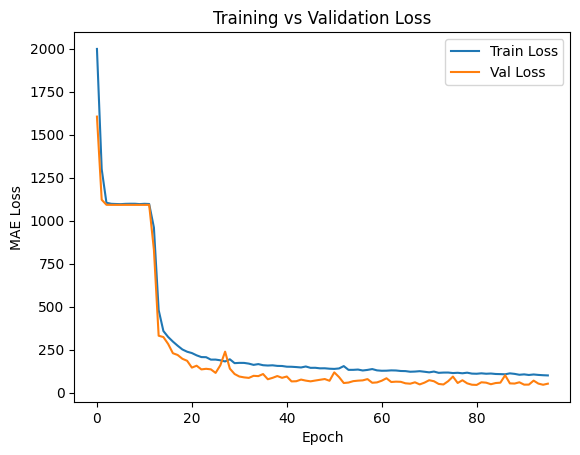

In [13]:
# --- Optional: Plot training history ---
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

In [14]:

# --- Load best model ---
best_model = load_model("best_lstmv1_model.keras")

# --- Evaluation ---
y_pred = best_model.predict(X_val).flatten()
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"\nLSTM MAE: {mae:.2f}")
print(f"LSTM R² Score: {r2:.3f}")

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

LSTM MAE: 46.47
LSTM R² Score: 0.994


In [17]:
# --- Testing ---
y_pred = best_model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nLSTM MAE: {mae:.2f}")
print(f"LSTM R² Score: {r2:.3f}")

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

LSTM MAE: 46.50
LSTM R² Score: 0.993
